In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

import nltk
from wordcloud import WordCloud
from scipy.sparse import csr_matrix

from gensim import corpora, models
from gensim.models.ldamodel import LdaModel
from gensim import similarities

from gensim.models.coherencemodel import CoherenceModel

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
file_path1 = "recipes_raw_nosource_ar.json"
allrecipes = pd.read_json(file_path1)
file_path2 = "recipes_raw_nosource_epi.json"
epicurious = pd.read_json(file_path2)
file_path3 = "recipes_raw_nosource_fn.json"
foodnetwork = pd.read_json(file_path3)

In [3]:
# reding from first file
allrecipes.head()

,rmK12Uau.ntP510KeImX506H6Mr6jTu,5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,clyYQv.CplpwJtjNaFGhx0VilNYqRxu,BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,kq.naD.8G19M4UU9dVvJgHtpfo.l/eC,lYrgWNn00EXblOupzM3tL0jGr9O0CB2,Fu0DgGYFUGwc0BBlN6r20o/ihOVs5bO,MBRNtqELRRuv8zJH4k7Aba2bmIc2A3C,ZPyPoMiNvgAfrKcRpH9FEYV/XsPZBsW,...,uHHb42/tuIKsmN5U6l9AD.FdVpSFxs6,IPAeN3L6rm2oughJpUhbG038k.ACJ0K,3UIhlTQFH5jyIaHN8zeKlK5V.94Kjwu,PdBxkE2gnI/.ynokkp1Hu1KLGZnGdei,SB46Udqc5Svsi70S1qRmRLv5tlg8Oca,gehEOcDPtU3SmNSXrwWwWD4ulPpUdMO,VRAsyF.1xMBYqAVKX1biyIORH6N6qzy,Lf8/u.0k2029QMSQFrHS4gRsvKOQFUG,ay.AqX/9ysBtWHcnHoDeGAyJ5Orla8e,2Q3Zpfgt/PUwn1YABjJ5A9T3ZW8xwVa
title,Slow Cooker Chicken and Dumplings,Awesome Slow Cooker Pot Roast,Brown Sugar Meatloaf,Best Chocolate Chip Cookies,Homemade Mac and Cheese Casserole,Banana Banana Bread,Chef John's Fisherman's Pie,Mom's Zucchini Bread,The Best Rolled Sugar Cookies,Singapore Chili Crabs,...,Citrus Creme Brulee,Honey Nutty Granola,Salmon en Croute,Homemade Blender Butter,Gluten Free Chicken Noodle Soup,Thai-Indian Veggie Soup,Coconut Milk-Free Panang Curry Chicken,Cooked Cold Salad,Easy Eggnog Creme Brulee,Super Power Stovetop Granola
ingredients,"[4 skinless, boneless chicken breast halves AD...",[2 (10.75 ounce) cans condensed cream of mushr...,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...","[1 cup butter, softened ADVERTISEMENT, 1 cup w...",[8 ounces whole wheat rotini pasta ADVERTISEME...,"[2 cups all-purpose flour ADVERTISEMENT, 1 tea...","[For potato crust: ADVERTISEMENT, 3 russet pot...","[3 cups all-purpose flour ADVERTISEMENT, 1 tea...","[1 1/2 cups butter, softened ADVERTISEMENT, 2 ...","[Sauce: ADVERTISEMENT, 1/2 cup ketchup ADVERTI...",...,"[2 oranges, juiced ADVERTISEMENT, lemon, juice...","[3 cups rolled oats ADVERTISEMENT, 1 1/2 cups ...","[1 cup watercress, or as desired ADVERTISEMENT...","[2 pints heavy whipping cream ADVERTISEMENT, s...",[1/2 (12 ounce) box Barilla® Gluten Free Elbow...,"[2 teaspoons olive oil ADVERTISEMENT, 1/4 cup ...","[2 cups light cream ADVERTISEMENT, 1/4 teaspoo...","[3 tablespoons bacon grease ADVERTISEMENT, 2 c...","[4 egg yolks ADVERTISEMENT, 1 tablespoon white...","[1/4 cup canola oil ADVERTISEMENT, 3 cups quic..."
instructions,"Place the chicken, butter, soup, and onion in ...","In a slow cooker, mix cream of mushroom soup, ...",Preheat oven to 350 degrees F (175 degrees C)....,Preheat oven to 350 degrees F (175 degrees C)....,Preheat oven to 350 degrees F. Line a 2-quart ...,Preheat oven to 350 degrees F (175 degrees C)....,Bring a large saucepan of salted water and to ...,Grease and flour two 8 x 4 inch pans. Preheat ...,"In a large bowl, cream together butter and sug...","Whisk ketchup, chicken broth, egg, soy sauce, ...",...,Preheat oven to 300 degrees F (150 degrees C)....,Preheat oven to 300 degrees F (150 degrees C)....,Preheat oven to 375 degrees F (190 degrees C)....,Pour cream into a blender. Cover and blend unt...,Saute onions in olive oil over medium heat unt...,Heat oil in a large pot over medium heat. Add ...,Heat cream and coconut extract in a skillet or...,Heat bacon grease in a skillet over medium-hig...,Preheat oven to 350 degrees F (175 degrees C)....,Heat 1/4 cup canola oil in large skillet over ...
picture_link,55lznCYBbs2mT8BTx6BTkLhynGHzM.S,QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi,YCnbhplMgiraW4rUXcybgSEZinSgljm,jRnWGDXDdyOg3rta4/HVAR2rD19XubC,aUca10AaD8T2yYvcLOgH/UJlR5/OhOe,YdgEVyLVffZgh9NZPN3Eqj6MaX8KdzK,UrgvDGu4roLiho160fTVIwCUrGZna8i,OFp6yXFwzlrkMQ5STffYPllxQvMVLUS,...,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,cWEzUSv9Ozr3b4MxNVCqJYgTjIS.kHm,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa


In [4]:
# reding from second file
epicurious.head()

,05zEpbSqcs9E0rcnCJWyZ9OgdH0MLby,mF5SZmoqxF4WtIlhLRvzuKk.z6s7P2S,oQV5D7cVbCFwmrDs3pBUv2y.AG0WV26,Z9seBJWaB5NkSp4DQHDnCAUBTwov/1u,bB3GxoAplVZeoX3fzWNWyeECtQFxw6G,FHQAJvovVtPyKWlzgFEHgSUJsCM2Tjq,Jt7RKsNPY7/1QrOjuPEomP/s6mD2AvO,1rBWKEw7vZjXA97NmHGS3VHq1iVX9c.,agTMHTysNlAOyMM3zQlXVu4qbJrLmqa,Y..dFCvcwNW4gdogZ3DqLUETR2x.uA2,...,VUfq3eH/dAQ2DDaa83Dp1x8Hdm7vCv6,g0paH27SGSQ/aN.el/wwu/nxX7RnmIi,ARu0StlTkUfsW5DKqtmupUEJyF8Rdh6,cbKR3qnmLFpQTNxrF7qYhy1kEaXJ6w.,K0hj3K9zJA3.WqLpYyijMgCYZ7dSQOu,lgygAJbdT1RNgrOYYveXtW4Ze9GtcZK,EgIvlp1EfF4qTsnSI3v7ViZF1b3f2qC,aCaoP.P8A1h6ALQmBnw3ypvYfRt/zZe,fGxd/ZNUQcXxxqaVgEtMJmsNKLbugAe,qznqHiNpq0AB1AYn002A2HvaEFnN0lq
ingredients,"[12 egg whites, 12 egg yolks, 1 1/2 cups sugar...","[18 fresh chestnuts, 2 1/2 pounds veal stew me...","[2 tablespoons unsalted butter, softened, 4 or...","[3/4 pound Stilton, crumbled (about 3 cups) an...","[2 cups (about 9 1/2 ounces) whole almonds, to...","[2 tablespoons butter, 2 tablespoons flour, 1 ...","[1/2 teaspoon finely grated fresh lemon zest, ...","[2 garlic cloves, finely chopped, 2 teaspoons ...","[2 tablespoons (1/4 stick) butter, 1/4 cup oli...","[1 recipe pâte à chou, About 1 cup pastry crea...",...,"[1 lemon, 4 pounds littleneck clams, 1 garlic ...","[2 large egg yolks, 2 tablespoons apple cider,...","[1 package (3.4 ounces) vanilla pudding, Veget...","[2 cups sugar, 2/3 cup plus 1/4 cup water, 1/2...","[1/2 cup sugar, 1/2 teaspoon each: ground clov...","[5 cups (about) canned beef broth, 1 cup lenti...","[1/2 teaspoon turmeric, 2 cups water, 3/4 poun...","[1 medium jalapeño, thinly sliced, 2 garlic cl...","[1 1/2 cups almond flour or almond meal, 1/2 c...","[1 1/2 pounds plum tomatoes, coarsely chopped ..."
picture_link,None,None,3xjktRst3I5lDZ2Z5kTOtqQyzZFFN9u,None,None,cvv25l1DWlsVF/1TPnkpMI8tLdIMGem,g2GPWB.pUjfUxA36R/G8tLTDbtlFtGS,None,None,/CJLlvthN5lJcsScHGU7CKrxbGS5ElW,...,J87nuNT0Lj8f1NkwCIDDKZvQPUyO39W,None,2z4akFs8e/HKRv2Ku6imTYbYXQEBU.a,None,None,None,16DvpBiksnvbWPCSdZUcPY3oFvgo0py,m6IALrfAOr5KDVpqKcvUNpa7VermSIq,wq1Cqtl16W8QpuFaXrDdB2kGsUn9Ku6,DIZQ16bhYvwR7yKtaNOQf3XkgD0vbCK
instructions,"Beat the egg whites until stiff, gradually add...",Preheat oven to 400°F. Using small sharp knife...,Preheat the oven to 350°F. Spread the softened...,"In a food processor blend the Stilton, the cre...",Position rack in center of oven and preheat to...,Melt the butter in a heavy-bottomed saucepan. ...,"Whisk together zest, lemon juice, and salt and...",Cook garlic and ginger in oil in a 1- to 1 1/2...,Preheat oven to 350°F. Melt 2 tablespoons butt...,Make cream puffs Preheat oven to 425°F. and bu...,...,Prepare a grill for medium-high heat. Cut lemo...,For crust: Whisk egg yolks and apple cider in ...,Make pudding as directed on package. Heat oven...,Stir sugar and 2/3 cup water in heavy medium s...,1. Preheat the oven to 350°:F. Combine the sug...,Bring 4 cups broth and lentils to boil in larg...,"Stir together turmeric, 1 1/2 cups water, and ...","Marinate and cook the steak: Combine jalapeño,...",Make the cakes: Preheat oven to 350°F. Line th...,"Preheat oven to 400°F. Combine plum tomatoes, ..."
title,Christmas Eggnog,"Veal, Carrot and Chestnut Ragoût",Caramelized Bread Pudding with Chocolate and C...,Sherried Stilton and Green Peppercorn Spread,Almond-Chocolate Macaroons,White Sauce or Bechamel Sauce,"Grilled Whole Mackerel with Lemon, Oregano, an...",Apricot Chutney,Garlic Croutons,Christmas Croquembouche,...,Grilled Clam Toasts With Lemon and Green Olives,Pear and Almond Tart,Tropical Fruit and Cake Trifle,Brandied Caramel Sauce,Festive Nuts,Spinach and Lentil Soup,Fresh Cheese with Spinach,Jalapeño and Lime–Marinated Skirt Steak Tacos,Semolina–Lemon Syrup Cakes,Chicken Cacciatore


In [5]:
# reding from third file
foodnetwork.head()

,p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,kRBQSWtqYWqtkb34FGeenBSbC32gIdO,PmoGGX9RC5zbMJXtZH1SKzWKLFX4Aii,g2RYP1spIUlAYsytDMsdfLNQEOnLUrO,94NWE4F4C5NzgH0zYqSdmPM/G55BjKO,HdIbPB/8cgk17hAzbc2jUN4VBn//QKS,mC7Nb4F2S.DMCjZ39kzS/ak9GqEp4iO,...,CUZuiIs2F5A4u4EzEXB/yHN38So5CRy,08JThnwO3qzkhSKVuef6Ehg.HVPXt7C,0jaoQnb1iG0bnScGJOt/zmAl6lsOh6y,6Qp4fKIuJAkrukUvmccA8qWrezzLwFq,xwEq9YYRt37I/LTqQUWvAi1uSusxhDm,4bfMWxlbKhx/McJq/89k0SBdw.VvAzW,T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m,f/coffo2TMs2J2gq5nTOUIqH2TRAkui,q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS,7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
instructions,Toss ingredients lightly and spoon into a butt...,Watch how to make this recipe.\nSprinkle the s...,"In a large saucepan, let the beans soak in eno...",Watch how to make this recipe.\nPreheat the ov...,Special equipment: sushi mat\nCook the brown r...,Heat a large nonstick skillet over medium-high...,Sprinkle the saffron into 1/4 cup hot water; l...,"If using top-sliced buns, spread softened butt...",Cut around the stems of the peppers (reserving...,Preheat the oven to 450 degrees F. Put the cau...,...,Fill a glass or cocktail shaker with some ice....,Watch how to make this recipe.\nHeat a heavy m...,Preheat the oven to 250 degrees F\nIn a small ...,Bring a small saucepan of water to a boil. Sep...,Grease 8 cream horn metal cones. Cut the puff ...,Watch how to make this recipe.\nPreheat a gril...,Preheat the broiler. Cut the tomatoes in 1/2 c...,Heat the oil and butter in a large skillet ove...,Preheat oven to 350 degrees. On the top half o...,Watch how to make this recipe.\nIn a medium sa...
ingredients,"[1/2 cup celery, finely chopped, 1 small green...","[2 pounds skirt steak, cut into 1/2-inch dice,...","[1 1/2 cups dried black beans, picked over and...","[1 1/4 pounds ground chuck, One 15-ounce can t...","[1 cup rice, brown, medium-grain, cooked, 1/2-...","[1 tablespoon extra-virgin olive oil, 2 baby I...",[1/2 teaspoon lightly crumbled saffron threads...,[4 top--sliced hot-dog buns (or fashion your o...,"[6 green or red bell peppers, 1/2 cup olive oi...","[1 medium head cauliflower (about 2 pounds), c...",...,"[Ice, 1 slice jalapeno, seeded 1 by 1/4-inch p...","[1/4 cup butter, 1/3 cup sugar, 1 teaspoon gro...","[2 cups coconut milk, 1 short stalk lemon gras...","[2 large heads garlic, 1 cut-up chicken, about...","[1 sheet frozen puff pastry, thawed, 1 egg, 1 ...","[4 ears fresh corn, 2 heads Belgian endive, 2 ...","[4 large plum tomatoes, Salt and sugar, 1 1/2 ...","[3 tablespoons olive oil, 2 tablespoons unsalt...","[8 ounces butter, 8 ounces bittersweet chocola...",[3 (10.5-ounce) cans restaurant-style condense...
title,Grammie Hamblet's Deviled Crab,Infineon Raceway Baked Beans,Southwestern Black Bean Dip,Sour Cream Noodle Bake,Sushi Renovation,Middle-Eastern Eggplant Rounds,Saffron Jewel Rice,Maine Lobster Rolls,Stuffed Peppers with Pilaf,Cauliflower with Brown Butter and Crispy Crumbs,...,Spicy Agave Wave,Apple Chimichangas,Coconut-Kaffir Leaf Poached Halibut with Saute...,Chicken Braised with 20 Cloves of Garlic,Cream Horns,Summer Corn Salad,Zucchini Stuffed Tomatoes,Pepper Pasta Quick Cook,Chocolate Cake with Armagnac Ice Cream,Crabby Bisque
picture_link,None,Ja5uaD8Q7m7vvtWwk2.48dr1eCre/qi,None,nm/WxalB.VjEZSa0iX9RuZ8xI51Y7bS,None,ibuqgKBoAYj7a086h/tYaHYu2M4N3pS,OR0cC2/SQlgojJz//n8XpUVphfPUuIi,None,None,None,...,1mj7YsV.BecQWcQXnLqOypoElrAkKXS,cSTbbKHkN5PMJvHd9ieoj3HevTJS9re,None,None,None,G9XPV1I0nULIbwS76f..0AIq2DsfI3u,nA7V5iQqaFcIEQQ0/MKqVdUioieXjPu,None,None,CTfEq6AD/JpKf4ys4awoYB4hpdzgXqm


In [6]:
#transposing each dataframe so that index becomes columns
# we can ge a df of shape 39802X4
allrecipes=allrecipes.transpose()
epicurious=epicurious.transpose()
foodnetwork=foodnetwork.transpose()
#merging all the above three dataframes together across rows
#stacking them on top of the other
df=pd.concat([allrecipes, epicurious, foodnetwork])
df.head()

,title,ingredients,instructions,picture_link
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe
clyYQv.CplpwJtjNaFGhx0VilNYqRxu,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56
BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi
N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm


In [7]:
# checking high level info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125164 entries, rmK12Uau.ntP510KeImX506H6Mr6jTu to 7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         124595 non-null  object
 1   ingredients   124647 non-null  object
 2   instructions  124473 non-null  object
 3   picture_link  82593 non-null   object
dtypes: object(4)
memory usage: 4.8+ MB


In [8]:
# resetting index and dropping unnecessary columns
df=df.reset_index()
df.drop(columns=['index', 'picture_link'], inplace=True)
df.head()

,title,ingredients,instructions
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ..."
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...


In [9]:
#checking the null values
df.isna().sum()

,0
title,569
ingredients,517
instructions,691


In [10]:
# visually inspecting rows where title is null
df[df['title'].isna()]

,title,ingredients,instructions
5874,NaN,NaN,NaN
15020,NaN,NaN,NaN
15023,NaN,NaN,NaN
15025,NaN,NaN,NaN
15637,NaN,NaN,NaN
...,...,...,...
124373,None,[],None
124851,NaN,NaN,NaN
124861,NaN,NaN,NaN
124915,NaN,NaN,NaN


In [11]:
# visually inspecting rows where instructions is null
df[df['instructions'].isna()]

,title,ingredients,instructions
5874,NaN,NaN,NaN
15020,NaN,NaN,NaN
15023,NaN,NaN,NaN
15025,NaN,NaN,NaN
15637,NaN,NaN,NaN
...,...,...,...
124861,NaN,NaN,NaN
124883,"Grilled Brioche ""S'mores""",[],None
124915,NaN,NaN,NaN
124960,NaN,NaN,NaN


In [12]:
# visually inspecting rows where ingredients is null
df[df['ingredients'].isna()]

,title,ingredients,instructions
5874,NaN,NaN,NaN
15020,NaN,NaN,NaN
15023,NaN,NaN,NaN
15025,NaN,NaN,NaN
15637,NaN,NaN,NaN
...,...,...,...
124226,NaN,NaN,NaN
124851,NaN,NaN,NaN
124861,NaN,NaN,NaN
124915,NaN,NaN,NaN


In [14]:
#dropping all the null values
df.dropna(inplace=True)

In [15]:
df.isna().sum()

,0
title,0
ingredients,0
instructions,0


In [16]:
#taking a look at random 20 rows
df.sample(20)

,title,ingredients,instructions
23653,Raspberry Salad Dressing I,"[1 cup plain yogurt ADVERTISEMENT, 1/2 cup ras...","In a blender, combine the yogurt, raspberries,..."
91273,"Vicki's Favorite Chicken with Grapes, Couscous...","[1 1/2 pound asparagus, 5 tablespoons extra-vi...",Heat oven to 400 degrees F.\nTrim tough ends o...
14620,Grilled Cheese of the Gods,"[1/4 cup butter, softened ADVERTISEMENT, 1 cup...","In a small bowl, mash together the butter and ..."
19407,Tourtiere Spices,"[1 teaspoon celery salt ADVERTISEMENT, 1/2 tea...","In a small bowl, combine celery salt, pepper, ..."
12135,Red Salad,"[4 medium beets ADVERTISEMENT, 2 large red pot...","Fill a large pot with water, and add beets. Br..."
14687,Creamy Zucchini Soup,"[1 tablespoon butter ADVERTISEMENT, 2 tablespo...",Melt the butter and heat the oil in a large sk...
60379,Cabernet-Braised Short Ribs with Gorgonzola Po...,"[8 to 9 pounds meaty beef short ribs, 2 tables...","Planning tip: With its various elements, this ..."
13362,Irish Cream Sugar Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 1/2 c...",Cream together butter and sugar until fluffy. ...
117079,Meatball-Tortellini Soup,"[8 ounces ground beef chuck, 1/4 cup grated pa...","Combine the beef, parmesan, 2 tablespoons pars..."
22247,Cauliflower Soup with Blue Cheese Fritters,"[Fritter Dough: ADVERTISEMENT, 1/4 cup water A...","Stir 1/4 cup water, 2 tablespoons butter, and ..."


In [17]:
#lets convert the list of items to set to avoid any repeated ingredients
df['ingredients']=df['ingredients'].apply(set)

#Number of elements in ingredients list
df['ingredient_item']=df['ingredients'].str.len()

In [18]:
#changing the display settings to see complete text
pd.set_option('display.max_colwidth', None)

In [19]:
df['ingredient_item'].max()

71

In [20]:
#recipe with maximum number of ingredients
df.loc[df['ingredient_item']==df['ingredient_item'].max()]

title  \
74826  Rebuilt Louisiana Seafood Platter   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ingredients  \
74826  {1/2 cup thinly sliced red cabbage, 1/4 teaspoon minced fresh garlic, 1 pinch ground white pepper, 1/2 pound unsalted butter, softened, 4 tablespoons grated Parmesan, 2 tablespoons minced shallots, 1/4 cup thinly sliced green onions, 1/2 teaspoon ground black pepper, 1/2 cup extra-virgin olive oil, 3/4 teaspoon ground paprika, 3 large cucumbers, 1 tablespoon white vinegar, 2 tablespoons unsalted butter, 2 cups whipping cream, 1/2 teaspoon dry mustard powder (recommended: Coleman's), 1/4 teaspoon salt, 1 egg yolk, 1 teaspoon finely chopped lime zest, 8 (4-ounce) Louisiana Drum Fish fillets, about 1/2-inch thick, 1/2 cup shelled pistachios, 1/2 teaspoon seafood seasoning (recommended: Chef Paul Prudhomme's Seafood Magic Seasoning), 1 tablespoon lemon juice, 4 tablespoons fine French bread crumbs, 1 tablespoon Creole mustard (recommended: Zatarain's), 1/2 cup clarified butter, 1/2 cup crab stock, 2 tablespoons whole-leaf dried tarragon leaves, 1 tablespoon lime juice, 1/2 teaspoon salt, 1 cup olive oil, 4 tablespoons melted unsalted butter, divided, 1/4 cup grated carrot, 1 teaspoon salt, 1/2 teaspoon dried whole-leaf oregano, 1 cup vegetable oil, 1 teaspoon minced fresh garlic, 3 drops hot pepper sauce (recommended: Tabasco), 3/4 cup diced yellow onion, 2 cups water, 1 cup Louisiana jumbo lump crabmeat, 8 to 10 teaspoons seafood seasoning (recommended: Chef Paul Prudhomme's Seafood Magic Seasoning), 3/4 teaspoon lemon juice, 1/2 cup fine French bread crumbs, 1 te

In [21]:
print(df['ingredients'][4])

{'3 cups fresh broccoli florets ADVERTISEMENT', '4 ounces reduced-fat cream cheese, cubed and softened ADVERTISEMENT', '1/2 cup fine dry Italian-seasoned bread crumbs ADVERTISEMENT', '8 ounces Cheddar cheese, shredded ADVERTISEMENT', '1 medium onion, chopped ADVERTISEMENT', '2 1/2 cups milk ADVERTISEMENT', '8 ounces whole wheat rotini pasta ADVERTISEMENT', '1/4 teaspoon salt ADVERTISEMENT', '1/8 teaspoon ground black pepper ADVERTISEMENT', 'ADVERTISEMENT', '2 tablespoons all-purpose flour ADVERTISEMENT', '4 tablespoons butter, divided ADVERTISEMENT', '3 cloves garlic, minced ADVERTISEMENT', 'Reynolds Wrap® Non Stick Aluminum Foil ADVERTISEMENT'}


In [22]:
print(df['instructions'][20])

Combine the potatoes, celery, onion, ham and water in a stockpot. Bring to a boil, then cook over medium heat until potatoes are tender, about 10 to 15 minutes. Stir in the chicken bouillon, salt and pepper.
In a separate saucepan, melt butter over medium-low heat. Whisk in flour with a fork, and cook, stirring constantly until thick, about 1 minute. Slowly stir in milk as not to allow lumps to form until all of the milk has been added. Continue stirring over medium-low heat until thick, 4 to 5 minutes.
Stir the milk mixture into the stockpot, and cook soup until heated through. Serve immediately.



In [23]:
df.sample(2)['instructions']

,instructions
92889,"Heat a griddle (or use a sandwich press) or cast-iron skillet to very hot. Spread the mustard and sour cream on the top halves. On the bottom halves layer the roasted pepper, mushrooms, spinach, olives, cheese and pickle. Cover with the top halves, and wrap each sandwich tightly in aluminum foil. Place these sandwiches on the griddle or skillet, and then place a heavy skillet on top; try to distribute the weight evenly over the sandwiches. (You can even use a brick to do this!) Cook 3 to 5 minutes, pressing down occasionally to flatten the sandwiches. Serve immediately."
33891,"Heat oil in a deep-fryer or large saucepan to 375 degrees F (190 degrees C).\nWhisk together eggs and milk in a bowl. In a separate bowl, stir together the bread flour and ground cereal. Coat the wings in the egg mixture, then in the cereal mixture.\nFry the wings, 6 at a time, in the oil until golden brown, 12 to 15 minutes. Let wings drain on paper towels.\nPreheat oven to 200 degrees F (95 degrees C). Line several baking sheets with parchment paper.\nWhile wings are frying, mix the melted butter, hot sauce, bourbon, honey, Worcestershire sauce, and habanero sauce in a large plastic tub with a lid. Place the wings into the sauce, close the lid, and shake to coat wings with sauce.\nPlace the wings on the prepared baking sheets and bake in the preheated oven until the sauce is slightly sticky, about 10 minutes.\n"


In [24]:
# adding ; in place if comma in list of items
df['items'] = df['ingredients'].apply(lambda x: ';'.join(map(str, x)))

In [25]:
df.head(2)

,title,ingredients,instructions,ingredient_item,items
0,Slow Cooker Chicken and Dumplings,"{2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT, 1 onion, finely diced ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT, 4 skinless, boneless chicken breast halves ADVERTISEMENT, ADVERTISEMENT}","Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n",6,"2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT;1 onion, finely diced ADVERTISEMENT;2 tablespoons butter ADVERTISEMENT;2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT;4 skinless, boneless chicken breast halves ADVERTISEMENT;ADVERTISEMENT"
1,Awesome Slow Cooker Pot Roast,"{1 1/4 cups water ADVERTISEMENT, 5 1/2 pounds pot roast ADVERTISEMENT, 1 (1 ounce) package dry onion soup mix ADVERTISEMENT, ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of mushroom soup ADVERTISEMENT}","In a slow cooker, mix cream of mushroom soup, dry onion soup mix and water. Place pot roast in slow cooker and coat with soup mixture.\nCook on High setting for 3 to 4 hours, or on Low setting for 8 to 9 hours.\n",5,1 1/4 cups water ADVERTISEMENT;5 1/2 pounds pot roast ADVERTISEMENT;1 (1 ounce) package dry onion soup mix ADVERTISEMENT;ADVERTISEMENT;2 (10.75 ounce) cans condensed cream of mushroom soup ADVERTISEMENT


In [26]:
#replacing the word ADVERTISEMENT
df['items']=df['items'].replace('ADVERTISEMENT', '', regex=True)
df.head()

,title,ingredients,instructions,ingredient_item,items
0,Slow Cooker Chicken and Dumplings,"{2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT, 1 onion, finely diced ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT, 4 skinless, boneless chicken breast halves ADVERTISEMENT, ADVERTISEMENT}","Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n",6,"2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ;1 onion, finely diced ;2 tablespoons butter ;2 (10.75 ounce) cans condensed cream of chicken soup ;4 skinless, boneless chicken breast halves ;"
1,Awesome Slow Cooker Pot Roast,"{1 1/4 cups water ADVERTISEMENT, 5 1/2 pounds pot roast ADVERTISEMENT, 1 (1 ounce) package dry onion soup mix ADVERTISEMENT, ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of mushroom soup ADVERTISEMENT}","In a slow cooker, mix cream of mushroom soup, dry onion soup mix and water. Place pot roast in slow cooker and coat with soup mixture.\nCook on High setting for 3 to 4 hours, or on Low setting for 8 to 9 hours.\n",5,1 1/4 cups water ;5 1/2 pounds pot roast ;1 (1 ounce) package dry onion soup mix ;;2 (10.75 ounce) cans condensed cream of mushroom soup
2,Brown Sugar Meatloaf,"{1/2 cup ketchup ADVERTISEMENT, 3/4 cup finely crushed saltine cracker crumbs ADVERTISEMENT, 2 eggs ADVERTISEMENT, 1/4 teaspoon ground black pepper ADVERTISEMENT, 1/2 cup packed brown sugar ADVERTISEMENT, 1/4 teaspoon ground ginger ADVERTISEMENT, 1 small onion, chopped ADVERTISEMENT, ADVERTISEMENT, 1 1/2 pounds lean ground beef ADVERTISEMENT, 1 1/2 teaspoons salt ADVERTISEMENT, 3/4 cup milk ADVERTISEMENT}","Preheat oven to 350 degrees F (175 degrees C). Lightly grease a 5x9 inch loaf pan.\nPress the brown sugar in the bottom of the prepared loaf pan and spread the ketchup over the sugar.\nIn a mixing bowl, mix thoroughly all remaining ingredients and shape into a loaf. Place on top of the ketchup.\nBake in preheated oven for 1 hour or until juices are clear.\n",11,"1/2 cup ketchup ;3/4 cup finely crushed saltine cracker crumbs ;2 eggs ;1/4 teaspoon ground black pepper ;1/2 cup packed brown sugar ;1/4 teaspoon ground ginger ;1 small onion, chopped ;;1 1/2 pounds lean ground beef ;1 1/2 teaspoons salt ;3/4 cup milk"
3,Best Chocolate Chip Cookies,"{1 teaspoon baking soda ADVERTISEMENT, 2 eggs ADVERTISEMENT, 2 teaspoons vanilla extract ADVERTISEMENT, 1 cup packed brown sugar ADVERTISEMENT, 1 cup white sugar ADVERTISEMENT, 2 teaspoons hot water ADVERTISEMENT, 3 cups all-purpose flour ADVERTISEMENT, ADVERTISEMENT, 1 cup chopped walnuts ADVERTISEMENT, 2 cups semisweet chocolate chips ADVERTISEMENT, 1 cup butter, softened ADVERTISEMENT, 1/2 teaspoon salt ADVERTISEMENT}","Preheat oven to 350 degrees F (175 degrees C).\nCream together the butter, white sugar, and brown sugar until smooth. Beat in the eggs one at a time, then stir in the vanilla. Dissolve baking soda in hot water. Add to batter along with salt. Stir in flour, chocolate chips, and nuts. Drop by large spoonfuls onto ungreased pans.\nBake for about 10 minutes in the preheated oven, or until edges are nicely browned.\n",12,"1 teaspoon baking soda ;2 eggs ;2 teaspoons vanilla extract ;1 cup packed brown sugar ;1 cup white sugar ;2 teaspoons hot water ;3 cups all-purpose flour ;;1 cup chopped walnuts ;2 cups semisweet chocolate chips ;1 cup butter, softened ;1/2 teaspoon salt"
4,Homemade Mac and Cheese Casserole,"{3 cups fresh broccoli florets ADVERTISEMENT, 4 ounces reduced-fat cream cheese, cubed and softened ADVERTISEMENT, 1/2 cup fine dry Italian-seasoned bread crumbs ADVERTISEMENT, 8 ounces Cheddar cheese, shredded ADVERTISEMENT, 1 medium onion, chopped ADVERTISEMENT, 2 1/2 cups milk ADVERTISEME

In [27]:
#finding out recipes where ingredient requirement is minimum
df.loc[df['ingredient_item']==df['ingredient_item'].min()]

,title,ingredients,instructions,ingredient_item,items
40299,To Roast and Peel Bell Peppers or Poblano Chiles,{},"Gas stove method: Lay bell peppers or chiles, on their sides, on racks of burners and turn flame on high. Char peppers or chiles, turning them with tongs, until skins are blackened, 3 to 8 minutes.\nLay bell peppers or chiles, on their sides, on racks of burners and turn flame on high. Char peppers or chiles, turning them with tongs, until skins are blackened, 3 to 8 minutes.\nBroiler method: Preheat broiler. Put peppers or chiles on rack of a broiler pan and broil about 2 inches from heat, turning them frequently, until skins are blistered and charred, about 5 minutes for chiles and about 15 minutes for peppers. Transfer peppers or chiles to a bowl and let stand, covered, until cool enough to handle. Wearing rubber gloves when handling chiles, peel peppers and chiles. Cut off tops and discard seeds and ribs.\nPreheat broiler.\nPut peppers or chiles on rack of a broiler pan and broil about 2 inches from heat, turning them frequently, until skins are blistered and charred, about 5 minutes for chiles and about 15 minutes for peppers.\nTransfer peppers or chiles to a bowl and let stand, covered, until cool enough to handle. Wearing rubber gloves when handling chiles, peel peppers and chiles. Cut off tops and discard seeds and ribs.",0,
40473,Opening a Fresh Coconut,{},"Heat the oven to 375°. Pierce the two or three ""eyes"" at one end with a clean screwdriver . Drain and refrigerate the liquid; use or freeze within 24 hours. Bake the drained coconut until the shell starts to crack, 20 to 25 minutes. Remove from the oven and cool. When cool enough to handle, tap it all over with a hammer to release the meat within the shell. Cover the coconut with a towel and hit the coconut hard with a hammer to break it open. The meat will separate from the hard outer shell. Remove the skin from the flesh with a vegetable peeler or paring knife. Use immediately or freeze pieces tightly wrapped in plastic film for later use.\nHeat the oven to 375°. Pierce the two or three ""eyes"" at one end with a clean screwdriver . Drain and refrigerate the liquid; use or freeze within 24 hours.\nBake the drained coconut until the shell starts to crack, 20 to 25 minutes. Remove from the oven and cool. When cool enough to handle, tap it all over with a hammer to release the meat within the shell.\nCover the coconut with a towel and hit the coconut hard with a hammer to break it open. The meat will separate from the hard outer shell.\nRemove the skin from the flesh with a vegetable peeler or paring knife. Use immediately or freeze pieces tightly wrapped in plastic film for later use.",0,
40557,Mango Purée,{},"Peel and pit 1 ripe mango and cut into pieces. In a food processor purée mango with 1 1/2 tablespoons sugar and 1 teaspoon fresh lemon juice until smooth. Purée keeps, covered and chilled, 3 days. Drizzle purée decoratively onto plates.\nPeel and pit 1 ripe mango and cut into pieces. In a food processor purée mango with 1 1/2 tablespoons sugar and 1 teaspoon fresh lemon juice until smooth. Purée keeps, covered and chilled, 3 days. Drizzle purée decoratively onto plates.",0,
41323,Smoked Salmon with Egg Salad and Green beans,{},,0,
41547,Herb Basting Brush,{},"Rather than using an ordinary basting brush, I prefer to make my own by securing a bunch of herb sprigs (rosemary, sage or thyme, or a combination, or other herbs, depending on what you are cooking) to a dowel, the handle of a wooden spoon, or a long-handled carving fork. The herb brush flavors the baste, releases oils into the crust as it builds, and eventually becomes a garnish for the Board Dressing.\nRather than using an ordinary basting brush, I prefer to make my own by securing a bunch of herb sprigs (rosemary, sage or thyme, or a combination, or other herbs, depending on what you are cooking) to a dowel, the handle of a wooden spoon, or a long-handled carving fork. The herb brush flav

In [28]:
df.loc[df['ingredient_item']==df['ingredient_item'].min()].index

Index([ 40299,  40473,  40557,  41323,  41547,  41966,  42015,  42680,  43604,
        44396,
       ...
       124930, 124985, 125001, 125029, 125074, 125102, 125104, 125107, 125115,
       125146],
      dtype='int64', length=1520)

In [29]:
df.drop(labels=df.loc[df['ingredient_item']==df['ingredient_item'].min()].index, axis=0, inplace=True )

In [30]:
df['recipe_words']=df['instructions'].apply(lambda x: len(x.split()))
df.loc[df['recipe_words']==df['recipe_words'].min()]

,title,ingredients,instructions,ingredient_item,items,recipe_words
43425,Mixed-Berry Daiquiri,"{1 cup light rum, 20 ice cubes (about 3 cups), 1/3 cup fresh lime juice, 1 cup frozen unsweetened boysenberries, thawed, 1 10-ounce package frozen sweetened strawberries, unthawed, cut into 8 pieces, 4 lime wedges, 4 fresh whole strawberries, 1 tablespoon powdered sugar, 1 10-ounce package frozen sweetened raspberries, thawed}",,9,"1 cup light rum;20 ice cubes (about 3 cups);1/3 cup fresh lime juice;1 cup frozen unsweetened boysenberries, thawed;1 10-ounce package frozen sweetened strawberries, unthawed, cut into 8 pieces;4 lime wedges;4 fresh whole strawberries;1 tablespoon powdered sugar;1 10-ounce package frozen sweetened raspberries, thawed",0
44537,Lime Daiquiri with Apricot Brandy,"{8 teaspoons apricot-flavored brandy, 3/4 cup light rum, 1/4 cup sugar, Ice cubes, 8 teaspoons Triple Sec, 1/2 cup fresh lime juice, 1 lime, thinly sliced into rounds}",,7,"8 teaspoons apricot-flavored brandy;3/4 cup light rum;1/4 cup sugar;Ice cubes;8 teaspoons Triple Sec;1/2 cup fresh lime juice;1 lime, thinly sliced into rounds",0
46859,Sweet Pâte Brisée (Short Crust Dough),"{3 large eggs, 1/4 teaspoon kosher salt, 1 cup (2 sticks) cold unsalted cultured butter, diced, 1 1/2 teaspoons guar gum, 1/4 cup sorghum flour, 3/4 cup cornstarch, 2 tablespoons granulated sugar, 3/4 cup + 2 tablespoons tapioca flour, 1/4 cup + 2 tablespoons glutinous rice flour, plus more for dusting}",,9,"3 large eggs;1/4 teaspoon kosher salt;1 cup (2 sticks) cold unsalted cultured butter, diced;1 1/2 teaspoons guar gum;1/4 cup sorghum flour;3/4 cup cornstarch;2 tablespoons granulated sugar;3/4 cup + 2 tablespoons tapioca flour;1/4 cup + 2 tablespoons glutinous rice flour, plus more for dusting",0
48632,Pineapple-Banana Smoothie,"{2 tablespoons honey, 2 ripe large bananas, peeled, cut into 1-inch pieces, frozen, 4 cups 1-inch pieces (about 1 medium) cored peeled pineapple, 2 cups apple juice, 2 cups ice cubes}",,5,"2 tablespoons honey;2 ripe large bananas, peeled, cut into 1-inch pieces, frozen;4 cups 1-inch pieces (about 1 medium) cored peeled pineapple;2 cups apple juice;2 cups ice cubes",0
49693,Strawberry Prosecco Soup,"{strawberries with Prosecco, tarragon, salt, and 2 tablespoons sugar, Purée mixture in a blender until smooth, then set aside 1 cup purée. Blend remaining mixture with yogurt and sugar to taste. Serve soup drizzled with reserved purée.}",,2,"strawberries with Prosecco, tarragon, salt, and 2 tablespoons sugar;Purée mixture in a blender until smooth, then set aside 1 cup purée. Blend remaining mixture with yogurt and sugar to taste. Serve soup drizzled with reserved purée.",0
54519,Baltimore Eggnog,"{Nutmeg, 1/2 pint light rum, 2 cups superfine sugar, 1 pint brandy, 1 pint heavy cream, 12 eggs, separated, 1/2 pint peach brandy, 3 pints milk}",,8,"Nutmeg;1/2 pint light rum;2 cups superfine sugar;1 pint brandy;1 pint heavy cream;12 eggs, separated;1/2 pint peach brandy;3 pints milk",0
55200,Maple Sausage,"{1/2 tsp chopped fresh thyme (or 1/4 tsp dried), 1/8 teaspoon each cayenne pepper, allspice and ground cloves, 1 pound ground turkey (93 percent lean), 1 tablespoon chopped fresh parsley (optional), 2 teaspoons olive oil, 1 1/2 teaspoon maple syrup, 3/4 teaspoon kosher salt, 2 teaspoons chopped fresh sage (or 1/2 teaspoon dried sage), 1 egg, 2 tablespoons quick-cooking oats, 1/4 teaspoon grated nutmeg, 1/2 teaspoon freshly ground black pepper, 1 clove garlic, finely chopped}",,13,"1/2 tsp chopped fresh thyme (or 1/4 tsp dried);1/8 teaspoon each cayenne pepper, allspice and ground cloves;1 pound ground turkey (93 percent lean);1 tablespoon chopped fresh parsley (optional);2 teaspoons olive oil;1 1/2 teaspoon maple syrup;3/4 teaspoon kosher salt;2 teaspoons chopped fresh sage (or 1/2 teaspoon dried sage);1 egg;2 tablespoons quick-cooking oats;1/4 teaspoon grated nutmeg;1/2 teaspoon freshly ground black pepper;1 clove garlic, finely chopped",0
55657,Broccolini

In [31]:
df.loc[df['recipe_words']==df['recipe_words'].min()].shape

(15, 6)

In [32]:
df.drop(labels=df.loc[df['recipe_words']==df['recipe_words'].min()].index, axis=0, inplace=True )

In [33]:
df.loc[df['recipe_words']==df['recipe_words'].min()].shape

(20, 6)

In [34]:
df.loc[df['recipe_words']==df['recipe_words'].min()]

,title,ingredients,instructions,ingredient_item,items,recipe_words
65262,Title,"{1 cup rice, 2 cup milk, 3 cup wheat}",;,3,1 cup rice;2 cup milk;3 cup wheat,1
67374,Southern Stuffing,"{6 cups brioche, 2 teaspoons dried sage, 1 teaspoon file gumbo powder, 1/4 cup green onion, chopped, 2 onions, chopped, 1 cup pecans, chopped, 1 cup chicken stock, 1 pound country ham, cubed, 4 ounces (1 stick) butter, 4 ribs celery, chopped, 3 tablespoons minced garlic, 1/2 cup parsley, chopped}",.;,12,"6 cups brioche;2 teaspoons dried sage;1 teaspoon file gumbo powder;1/4 cup green onion, chopped;2 onions, chopped;1 cup pecans, chopped;1 cup chicken stock;1 pound country ham, cubed;4 ounces (1 stick) butter;4 ribs celery, chopped;3 tablespoons minced garlic;1/2 cup parsley, chopped",1
70235,Title,{1 cup acerola},;,1,1 cup acerola,1
77733,Gas Station Cue,"{1 tri tip roast (1 1/2 to 2 pounds), Dry rub of your choice, 1 rack pork baby back ribs}",;,3,1 tri tip roast (1 1/2 to 2 pounds);Dry rub of your choice;1 rack pork baby back ribs,1
79638,Dark Chocolate as a Snack,{1 ounce dark chocolate},;,1,1 ounce dark chocolate,1
86852,New England Stuffing,"{1 cup chestnuts, roasted and shelled, 1/2 cup chopped fresh herbs such as parsley, thyme, and marjoram, 2 onions, chopped, 1 pound fresh shucked oysters, with liquor, 6 cups sourdough bread, cubed and toasted, 1 cup chicken stock, 1 pound slab bacon, cubed, 4 ounces (1 stick) butter, 4 ribs celery, chopped}",.;,9,"1 cup chestnuts, roasted and shelled;1/2 cup chopped fresh herbs such as parsley, thyme, and marjoram;2 onions, chopped;1 pound fresh shucked oysters, with liquor;6 cups sourdough bread, cubed and toasted;1 cup chicken stock;1 pound slab bacon, cubed;4 ounces (1 stick) butter;4 ribs celery, chopped",1
87268,Title,{1 cup},;,1,1 cup,1
88583,Real Time Cooking -- Out of the Fridge and Pantry,"{Sake, Hoisin sauce, Chicken stock, low sodium, Rices: sushi, jasmine, long grain, risotto, Cilantro, Miso, Limes, Thai bird chiles, Kaffir lime leaves, Wasabi, Oyster sauce, Coconut milk, Garlic, Fish sauce (3 Crab brand), Sambal, Nori, Wonton skins, Sesame oil, Onions, Lumpia wrappers, Ground chicken or meat, chicken thighs, Serrano chiles (or jalepenos), Rice wine vinegar, Thin soy sauce, Noodles: chow mein, rice stick, mung bean, Scallions, Veggies: zucchini, spinach, peppers, iceberg lettuce, Rock shrimp, bay scallops or some fish fillet, Ginger, Lemongrass}",.,30,"Sake;Hoisin sauce;Chicken stock, low sodium;Rices: sushi, jasmine, long grain, risotto;Cilantro;Miso;Limes;Thai bird chiles;Kaffir lime leaves;Wasabi;Oyster sauce;Coconut milk;Garlic;Fish sauce (3 Crab brand);Sambal;Nori;Wonton skins;Sesame oil;Onions;Lumpia wrappers;Ground chicken or meat, chicken thighs;Serrano chiles (or jalepenos);Rice wine vinegar;Thin soy sauce;Noodles: chow mein, rice stick, mung bean;Scallions;Veggies: zucchini, spinach, peppers, iceberg lettuce;Rock shrimp, bay scallops or some fish fillet;Ginger;Lemongrass",1
88585,Title,"{1/4 cup chopped onions, 2 tablespoons chopped green bell peppers, 3 tablespoons unsalted butter}",;,3,1/4 cup chopped onions;2 tablespoons chopped green bell peppers;3 tablespoons unsalted butter,1
88620,Southwest Stuffing,"{1 pound andouille sausage, 1/4 cup roasted green chiles, 3 cups country white bread, cubed and toasted, 2 onions, chopped, 1/4 cup parsley, 2 teaspoon chili powder, 1/4 cup roasted garlic, 1 cup chicken stock, 1/2 cup corn kernels, 1/4 cup cilantro, chopped, 1 cup pumpkin seeds, toasted, 4 ounces (1 stick) butter, 3 cups whole wheat bread, cubed and toasted}",.;,13,"1 pound andouille sausage;1/4 cup roasted green chiles;3 cups country white bread, cubed and toasted;2 onions, chopped;1/4 cup parsley;2 teaspoon chili powder;1/4 cup roasted garlic;1 cup chicken stock;1/2 cup corn kernels;1/4 cup cilantro, chopped;1 cup pumpkin seeds, toasted;4 ounces (1 stick) butter;3 cups whole wheat bread, cubed and toasted",1


In [35]:
df.drop(labels=df.loc[df['recipe_words']==df['recipe_words'].min()].index, axis=0, inplace=True )

In [36]:
df[df['instructions'].str.contains('Photograph')]

,title,ingredients,instructions,ingredient_item,items,recipe_words
65131,Saffron Jewel Rice,"{1/4 cup dried apricots, finely chopped, 1/3 cup blanched almonds, roughly chopped, 2 tablespoons chopped fresh parsley, Small pinch of ground cumin, Kosher salt, 4 tablespoons unsalted butter, 2 cups basmati rice, rinsed well, 1 cinnamon stick, 1 carrot, shredded, 1/3 cup sugar, 2 wide strips orange zest, thinly sliced, Small pinch of ground allspice, 1/3 cup pistachios, 1/3 cup dried cranberries, 3 green cardamom pods, 1/2 teaspoon lightly crumbled saffron threads, 1 small onion, finely chopped}","Sprinkle the saffron into 1/4 cup hot water; let sit 15 minutes. Meanwhile, combine 2 cups water, the sugar and a pinch of salt in a small saucepan and bring to a boil. Add the orange zest and carrot, reduce the heat to medium low and simmer until tender, about 4 minutes. Drain and transfer to a bowl; set aside.\nHeat 2 tablespoons butter in a large pot over medium heat. Add the onion, cinnamon stick, cardamom, allspice, cumin and a pinch of salt and cook, stirring occasionally, until the onion is translucent, about 8 minutes. Add the rice and 3/4 teaspoon salt and stir to coat. Add 3 cups water, increase the heat to medium high and simmer until the water has mostly evaporated, about 4 minutes. Cover the pot with foil and the lid, reduce the heat to low and cook until the water is completely absorbed, about 12 minutes. Remove from the heat and let stand 5 minutes.\nMeanwhile, melt 1 tablespoon butter in a medium skillet over medium-high heat. Add the pistachios and almonds and cook until just lightly golden, about 1 minute. Remove from the heat and add the dried cranberries and apricots, and 1 tablespoon of the prepared saffron water; stir to combine, then transfer to a bowl and set aside for topping.\nUncover the rice and fluff with a fork; discard the cinnamon stick and cardamom pods. Transfer about half of the rice to a serving bowl. Add the remaining saffron water, 1 tablespoon butter and the reserved orange peel and carrot to the rice in the pot and stir gently. Add the yellow rice to the white rice and gently toss; sprinkle with the pistachio mixture and parsley.\nPhotograph by Con Poulos",17,"1/4 cup dried apricots, finely chopped;1/3 cup blanched almonds, roughly chopped;2 tablespoons chopped fresh parsley;Small pinch of ground cumin;Kosher salt;4 tablespoons unsalted butter;2 cups basmati rice, rinsed well;1 cinnamon stick;1 carrot, shredded;1/3 cup sugar;2 wide strips orange zest, thinly sliced;Small pinch of ground allspice;1/3 cup pistachios;1/3 cup dried cranberries;3 green cardamom pods;1/2 teaspoon lightly crumbled saffron threads;1 small onion, finely chopped",290
65169,Pasta with Pancetta and Lentils,"{1 14-ounce can lentils, drained, 12 ounces bucatini or spaghetti, Kosher salt, 4 cloves garlic, thinly sliced, 1 28-ounce can whole plum tomatoes, crushed by hand, 2 tablespoons olive oil, plus more for drizzling, 1/2 teaspoon red pepper flakes, 1/2 cup finely chopped onion, 1/2 cup finely chopped pancetta (about 2 ounces), 1/2 cup grated parmesan, 8 basil leaves, roughly chopped, plus more for topping}","Bring a large pot of salted water to a boil. Add the pasta and cook as the label directs; drain.\nMeanwhile, heat the olive oil in a large skillet over medium heat. Add the pancetta and cook, stirring occasionally, until crisp, about 7 minutes. Add the onion and cook until soft, about 2 minutes. Add the garlic and red pepper flakes and cook, stirring, until the garlic begins to brown, about 2 minutes. Stir in the lentils, then add the tomatoes, 2 cups water, the basil and 1/2 teaspoon salt. Increase the heat to medium high and bring the sauce to a boil; cook 3 minutes. Reduce the heat to medium low and simmer, stirring occasionally, until slightly thickened, about 10 minutes.\nAdd the pasta to the sauce along with half of the parmesan. Season with salt and toss. Divide among bowls; drizzle with olive oil and top with the rem

In [37]:

df_clean=df.copy()
#find rows which contain 'Photograph by XXX XXX'
mask=df[df['instructions'].str.contains('Photograph')]

# remove the last four words from the instructions which contain 'Photograph by XXX XXX'
df_clean.loc[mask.index, 'instructions']=mask['instructions'].map(lambda x: ' '.join(x.split()[:-4]))
df_clean.head()

,title,ingredients,instructions,ingredient_item,items,recipe_words
0,Slow Cooker Chicken and Dumplings,"{2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT, 1 onion, finely diced ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT, 4 skinless, boneless chicken breast halves ADVERTISEMENT, ADVERTISEMENT}","Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n",6,"2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ;1 onion, finely diced ;2 tablespoons butter ;2 (10.75 ounce) cans condensed cream of chicken soup ;4 skinless, boneless chicken breast halves ;",53
1,Awesome Slow Cooker Pot Roast,"{1 1/4 cups water ADVERTISEMENT, 5 1/2 pounds pot roast ADVERTISEMENT, 1 (1 ounce) package dry onion soup mix ADVERTISEMENT, ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of mushroom soup ADVERTISEMENT}","In a slow cooker, mix cream of mushroom soup, dry onion soup mix and water. Place pot roast in slow cooker and coat with soup mixture.\nCook on High setting for 3 to 4 hours, or on Low setting for 8 to 9 hours.\n",5,1 1/4 cups water ;5 1/2 pounds pot roast ;1 (1 ounce) package dry onion soup mix ;;2 (10.75 ounce) cans condensed cream of mushroom soup,44
2,Brown Sugar Meatloaf,"{1/2 cup ketchup ADVERTISEMENT, 3/4 cup finely crushed saltine cracker crumbs ADVERTISEMENT, 2 eggs ADVERTISEMENT, 1/4 teaspoon ground black pepper ADVERTISEMENT, 1/2 cup packed brown sugar ADVERTISEMENT, 1/4 teaspoon ground ginger ADVERTISEMENT, 1 small onion, chopped ADVERTISEMENT, ADVERTISEMENT, 1 1/2 pounds lean ground beef ADVERTISEMENT, 1 1/2 teaspoons salt ADVERTISEMENT, 3/4 cup milk ADVERTISEMENT}","Preheat oven to 350 degrees F (175 degrees C). Lightly grease a 5x9 inch loaf pan.\nPress the brown sugar in the bottom of the prepared loaf pan and spread the ketchup over the sugar.\nIn a mixing bowl, mix thoroughly all remaining ingredients and shape into a loaf. Place on top of the ketchup.\nBake in preheated oven for 1 hour or until juices are clear.\n",11,"1/2 cup ketchup ;3/4 cup finely crushed saltine cracker crumbs ;2 eggs ;1/4 teaspoon ground black pepper ;1/2 cup packed brown sugar ;1/4 teaspoon ground ginger ;1 small onion, chopped ;;1 1/2 pounds lean ground beef ;1 1/2 teaspoons salt ;3/4 cup milk",67
3,Best Chocolate Chip Cookies,"{1 teaspoon baking soda ADVERTISEMENT, 2 eggs ADVERTISEMENT, 2 teaspoons vanilla extract ADVERTISEMENT, 1 cup packed brown sugar ADVERTISEMENT, 1 cup white sugar ADVERTISEMENT, 2 teaspoons hot water ADVERTISEMENT, 3 cups all-purpose flour ADVERTISEMENT, ADVERTISEMENT, 1 cup chopped walnuts ADVERTISEMENT, 2 cups semisweet chocolate chips ADVERTISEMENT, 1 cup butter, softened ADVERTISEMENT, 1/2 teaspoon salt ADVERTISEMENT}","Preheat oven to 350 degrees F (175 degrees C).\nCream together the butter, white sugar, and brown sugar until smooth. Beat in the eggs one at a time, then stir in the vanilla. Dissolve baking soda in hot water. Add to batter along with salt. Stir in flour, chocolate chips, and nuts. Drop by large spoonfuls onto ungreased pans.\nBake for about 10 minutes in the preheated oven, or until edges are nicely browned.\n",12,"1 teaspoon baking soda ;2 eggs ;2 teaspoons vanilla extract ;1 cup packed brown sugar ;1 cup white sugar ;2 teaspoons hot water ;3 cups all-purpose flour ;;1 cup chopped walnuts ;2 cups semisweet chocolate chips ;1 cup butter, softened ;1/2 teaspoon salt",74
4,Homemade Mac and Cheese Casserole,"{3 cups fresh broccoli florets ADVERTISEMENT, 4 ounces reduced-fat cream cheese, cubed and softened ADVERTISEMENT, 1/2 cup fine dry Italian-seasoned bread crumbs ADVERTISEMENT, 8 ounces Cheddar cheese, shredded ADVERTISEMENT, 1 medium onion, chopped ADVERTISEMENT, 2 

In [38]:
df_clean.iloc[:,[0, 2, 3, 4, 5]].duplicated().sum()

1085

In [39]:
df_clean.loc[df_clean.iloc[:,[0, 2, 3, 4, 5]].duplicated()]

,title,ingredients,instructions,ingredient_item,items,recipe_words
2222,Double Layer Pumpkin Cheesecake,"{1/2 teaspoon ground cinnamon ADVERTISEMENT, 1/2 cup pumpkin puree ADVERTISEMENT, 2 eggs ADVERTISEMENT, 2 (8 ounce) packages cream cheese, softened ADVERTISEMENT, 1 (9 inch) prepared graham cracker crust ADVERTISEMENT, 1/2 cup white sugar ADVERTISEMENT, 1/2 teaspoon vanilla extract ADVERTISEMENT, ADVERTISEMENT, 1 pinch ground cloves ADVERTISEMENT, 1/2 cup frozen whipped topping, thawed ADVERTISEMENT, 1 pinch ground nutmeg ADVERTISEMENT}","Preheat oven to 325 degrees F (165 degrees C).\nIn a large bowl, combine cream cheese, sugar and vanilla. Beat until smooth. Blend in eggs one at a time. Remove 1 cup of batter and spread into bottom of crust; set aside.\nAdd pumpkin, cinnamon, cloves and nutmeg to the remaining batter and stir gently until well blended. Carefully spread over the batter in the crust.\nBake in preheated oven for 35 to 40 minutes, or until center is almost set. Allow to cool, then refrigerate for 3 hours or overnight. Cover with whipped topping before serving.\n",11,"1/2 teaspoon ground cinnamon ;1/2 cup pumpkin puree ;2 eggs ;2 (8 ounce) packages cream cheese, softened ;1 (9 inch) prepared graham cracker crust ;1/2 cup white sugar ;1/2 teaspoon vanilla extract ;;1 pinch ground cloves ;1/2 cup frozen whipped topping, thawed ;1 pinch ground nutmeg",97
8484,Green Beans With Walnuts,"{2 pounds fresh green beans, washed and trimmed ADVERTISEMENT, ground black pepper to taste ADVERTISEMENT, 2 tablespoons walnut oil ADVERTISEMENT, salt to taste ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, 2 tablespoons minced fresh parsley ADVERTISEMENT, ADVERTISEMENT, 1 cup chopped walnuts ADVERTISEMENT}","Place the walnuts on an ungreased baking sheet. Bake at 350 degrees F (175 degrees C) for 5 to 8 minutes.\nCook beans in large pot of boiling salted water until just tender, about 5 minutes. Drain. Rinse beans with cold water, and drain well. Can be prepared 6 hours ahead. Let stand at room temperature.\nMelt butter or margarine with oil in heavy large skillet over high heat. Add beans and toss until heated through, about 4 minutes. Season with salt and pepper. Add walnuts and parsley and toss. Transfer to bowl and serve.\n",8,"2 pounds fresh green beans, washed and trimmed ;ground black pepper to taste ;2 tablespoons walnut oil ;salt to taste ;2 tablespoons butter ;2 tablespoons minced fresh parsley ;;1 cup chopped walnuts",95
9294,Baby Carrots And Brussels Sprouts Glazed With Brown Sugar and Pepper,"{2 pounds baby carrots ADVERTISEMENT, 1 1/2 cups chicken broth ADVERTISEMENT, 1/3 cup packed brown sugar ADVERTISEMENT, 2 pounds Brussels sprouts, trimmed and scored ADVERTISEMENT, ADVERTISEMENT, 1 tablespoon ground black pepper ADVERTISEMENT, 6 tablespoons butter ADVERTISEMENT}","Blanch carrots in a large pot of boiling salted water until crisp-tender, about 4 minutes. Transfer carrots to bowl of ice water using slotted spoon. Return water to boil. Add sprouts and blanch until crisp-tender, about 5 minutes. Transfer to another bowl of ice water. Drain vegetables, and refrigerate if making ahead.\nBring stock, butter or margarine, and brown sugar to a boil in a heavy large skillet. Stir until sugar dissolves. Boil until reduced by half, about 7 minutes. Can be prepared 6 hours ahead; return to boil before continuing. Add carrots. Cook until almost tender and sauce begins to coat, shaking pan occasionally, about 6 minutes. Add Brussels sprouts and pepper. Cook until heated through, stirring occasionally, about 4 minutes.\n",7,"2 pounds baby carrots ;1 1/2 cups chicken broth ;1/3 cup packed brown sugar ;2 pounds Brussels sprouts, trimmed and scored ;;1 tablespoon ground black pepper ;6 tablespoons butter",122
10317,Cranberry Chutney I,"{1/2 teaspoon ground cinnamon ADVERTISEMENT, 3/4 cup white sugar ADVERTISEMENT, 1/8 teaspoon ground cloves ADVERTISEMENT, 1/2 cup raisins ADVERTISEMENT, 1/4 teaspoon ground ginger ADVERTISEMENT,

In [40]:
df_clean.loc[df['title']=='Green Beans With Walnuts']

,title,ingredients,instructions,ingredient_item,items,recipe_words
7423,Green Beans With Walnuts,"{2 pounds fresh green beans, washed and trimmed ADVERTISEMENT, ground black pepper to taste ADVERTISEMENT, 2 tablespoons walnut oil ADVERTISEMENT, salt to taste ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, 2 tablespoons minced fresh parsley ADVERTISEMENT, ADVERTISEMENT, 1 cup chopped walnuts ADVERTISEMENT}","Place the walnuts on an ungreased baking sheet. Bake at 350 degrees F (175 degrees C) for 5 to 8 minutes.\nCook beans in large pot of boiling salted water until just tender, about 5 minutes. Drain. Rinse beans with cold water, and drain well. Can be prepared 6 hours ahead. Let stand at room temperature.\nMelt butter or margarine with oil in heavy large skillet over high heat. Add beans and toss until heated through, about 4 minutes. Season with salt and pepper. Add walnuts and parsley and toss. Transfer to bowl and serve.\n",8,"2 pounds fresh green beans, washed and trimmed ;ground black pepper to taste ;2 tablespoons walnut oil ;salt to taste ;2 tablespoons butter ;2 tablespoons minced fresh parsley ;;1 cup chopped walnuts",95
8484,Green Beans With Walnuts,"{2 pounds fresh green beans, washed and trimmed ADVERTISEMENT, ground black pepper to taste ADVERTISEMENT, 2 tablespoons walnut oil ADVERTISEMENT, salt to taste ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, 2 tablespoons minced fresh parsley ADVERTISEMENT, ADVERTISEMENT, 1 cup chopped walnuts ADVERTISEMENT}","Place the walnuts on an ungreased baking sheet. Bake at 350 degrees F (175 degrees C) for 5 to 8 minutes.\nCook beans in large pot of boiling salted water until just tender, about 5 minutes. Drain. Rinse beans with cold water, and drain well. Can be prepared 6 hours ahead. Let stand at room temperature.\nMelt butter or margarine with oil in heavy large skillet over high heat. Add beans and toss until heated through, about 4 minutes. Season with salt and pepper. Add walnuts and parsley and toss. Transfer to bowl and serve.\n",8,"2 pounds fresh green beans, washed and trimmed ;ground black pepper to taste ;2 tablespoons walnut oil ;salt to taste ;2 tablespoons butter ;2 tablespoons minced fresh parsley ;;1 cup chopped walnuts",95


In [41]:
#dropping ingredients column as it doesn't allow to check for duplicates since it is a list and we already
#have the same information in the items column
df_clean.drop(columns='ingredients', inplace=True)
df_clean.drop_duplicates(keep='first', inplace=True)

In [42]:
df_clean.shape

(121833, 5)

In [43]:
df_clean['items'][599]

'1 (14.5 ounce) can chicken broth ;1/4 teaspoon ground cumin ;1 (15 ounce) can white beans ;1 pinch salt and black pepper to taste ;1/2 teaspoon ground coriander seed ;1 (7 ounce) can diced green chiles ;2 tablespoons vegetable oil ;1 (18.75 ounce) can tomatillos, drained and chopped ;1/2 teaspoon dried oregano ;;2 ears fresh corn ;1 onion, chopped ;1 (16 ounce) can diced tomatoes ;2 cloves garlic, minced ;1 pound diced, cooked chicken meat '

In [44]:
#cell block to clean the text data - removing white spaces, numbers, punctuations, stop-words and does lemmetization

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download("punkt", quiet=True)
nltk.download("wordnet", quiet=True)
nltk.download("stopwords", quiet=True)
nltk.download('omw-1.4', quiet=True)

# Function for text standardization
def standardize_text(input_text):
    cleaned_text = []

    for text in input_text:
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.replace('\n',' ') # Remove New Lines
        text = text.strip() # Remove Leading White Space
        text = re.sub(' +', ' ', text) # Remove multiple white spaces

        # Tokenize the ingredient
        tokens = word_tokenize(text.lower())

        # Unit normalization mapping
        unit_mapping = {
            "tsp": "teaspoon",
            "tbsp": "tablespoon",
            "oz": "ounce",
            "g": "gram",
            "lb": "pound"
            }

        # Standardize units and remove quantities
        standardized_tokens = []
        for token in tokens:
            # Remove quantities (check for numeric tokens)
            if not token.isnumeric():
                # Normalize units
                if token in unit_mapping:
                    token = unit_mapping[token]
                standardized_tokens.append(token)

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        standardized_tokens = [lemmatizer.lemmatize(token) for token in standardized_tokens]

        # Stop word removal
        stop_words = set(stopwords.words("english"))
        standardized_tokens = [token for token in standardized_tokens if token not in stop_words]

        # Words to remove
        common_words= ["teaspoon", "tablespoon", "ounce", "gram", "pound", "cup", "chopped", "fresh", "ground", "large", "sliced", "peeled",
                       "cut", "freshly", "finely", "plus", "white", "clove", "room", "dry" , "inch"]
        standardized_tokens = [token for token in standardized_tokens if token not in common_words]

        # Join the standardized tokens back to form the ingredient string
        standardized_text = " ".join(standardized_tokens)

        cleaned_text.append(standardized_text)

    return cleaned_text

In [45]:
standardized_ingredients=standardize_text(df_clean['items'])

In [46]:
standardized_ingredients[788]

'whole black olive green onion black pepper olive oil garlic powder pepperoni sausage strip cooked elbow macaroni red wine vinegar sugar dried basil mushroom cherry tomato halved red bell pepper crumbled feta cheese dried oregano'

In [47]:
from collections import Counter
# Calculate word frequencies
word_freq = Counter(" ".join(standardized_ingredients).split())
# Sort word frequencies in descending order
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

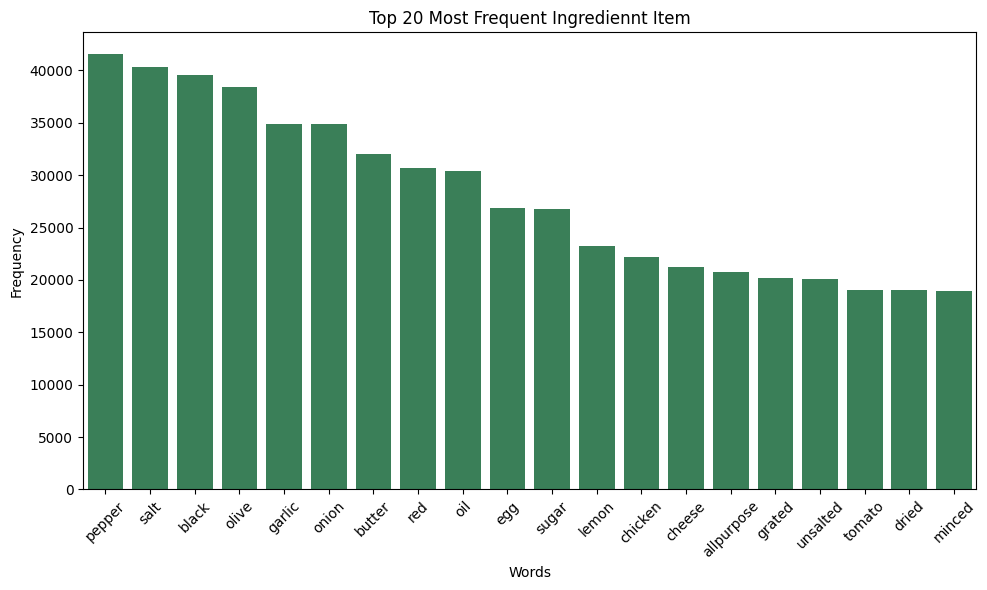

In [48]:
# Top N most frequent words to display
top_n = 20

# Get the top N words and their frequencies
top_words = list(sorted_word_freq.keys())[:top_n]
top_freq = list(sorted_word_freq.values())[:top_n]

plt.figure(figsize=(10,6))
sns.barplot(x=top_words, y=top_freq, color='seagreen')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Ingrediennt Item'.format(top_n))
plt.tight_layout()
plt.show()

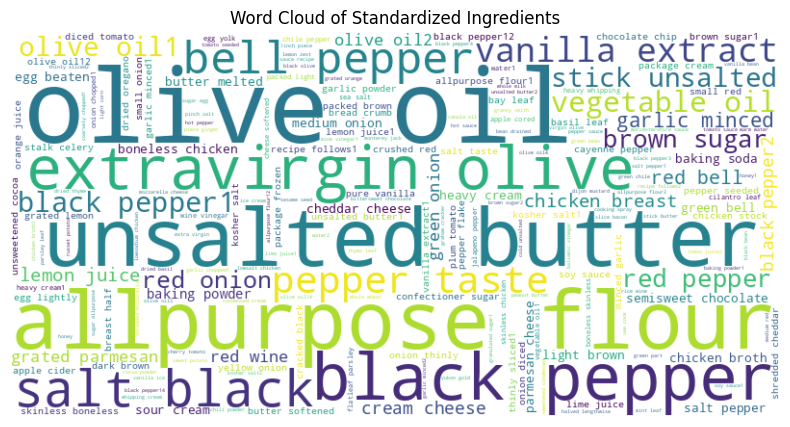

In [49]:
from wordcloud import WordCloud
# Concatenate all the standardized ingredients into a single text
text_data = " ".join(standardized_ingredients)
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Standardized Ingredients')
plt.show()

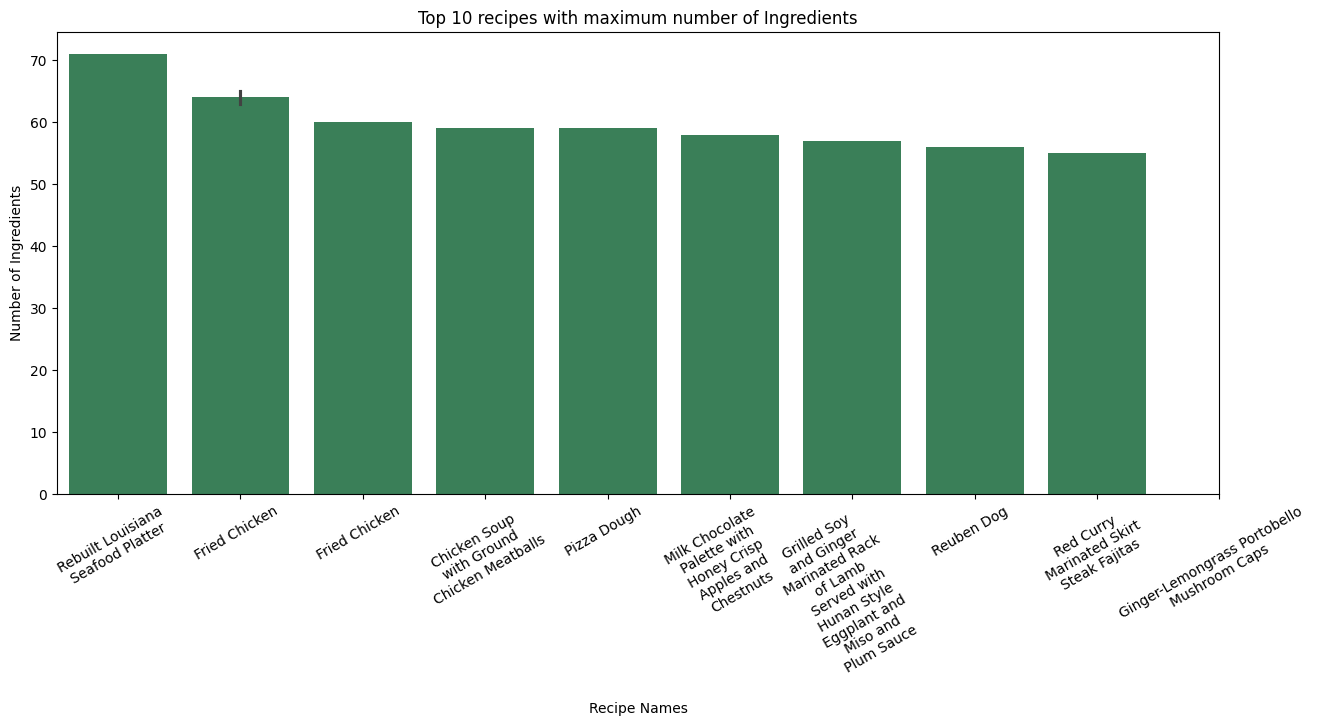

In [50]:
#function to wrap xaxix tick names
#Add new line after three words
def wrap_text(sentence):
    a=sentence.split()
    n=2
    ret= ''
    for i in range(0, len(a), n):
         ret += ' '.join(a[i:i+n]) + '\n'
    return ret
df_plot=df_clean[['title', 'ingredient_item']].sort_values(by='ingredient_item', ascending=False).head(10)
df_plot['wrapped_text']=df_plot['title'].apply(lambda x: wrap_text(x))
plt.figure(figsize=(15,6))
sns.barplot(data=df_plot,
            x='title', y='ingredient_item', color='seagreen')
plt.xlabel('Recipe Names')
plt.ylabel('Number of Ingredients')
plt.xticks(range(0,len(df_plot.index)), df_plot['wrapped_text'].values, rotation=30)
plt.title('Top 10 recipes with maximum number of Ingredients')
plt.show()

In [51]:
all_text=df_clean['title']+ ' '+df_clean['items']+' '+df_clean['instructions']

In [52]:
cleaned_ver=standardize_text(all_text)

In [53]:
df_all=pd.DataFrame(cleaned_ver)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121833 entries, 0 to 121832
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       121833 non-null  object
dtypes: object(1)
memory usage: 951.9+ KB


In [54]:
df_all=df_all.rename(columns={0: 'combined_text'})

In [55]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121833 entries, 0 to 121832
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   combined_text  121833 non-null  object
dtypes: object(1)
memory usage: 951.9+ KB


In [56]:
df_all.head(2)

,combined_text
0,slow cooker chicken dumpling package refrigerated biscuit dough torn piece onion diced butter condensed cream chicken soup skinless boneless chicken breast half place chicken butter soup onion slow cooker fill enough water cover cover cook hour high minute serving place torn biscuit dough slow cooker cook dough longer raw center
1,awesome slow cooker pot roast water pot roast package onion soup mix condensed cream mushroom soup slow cooker mix cream mushroom soup onion soup mix water place pot roast slow cooker coat soup mixture cook high setting hour low setting hour


In [57]:
combined_text= df_all['combined_text'].tolist()

In [58]:
combined_text[15238]

'pesto zoodles drained rinsed canned garbanzo bean chickpea shredded cheddar cheese taste salt black pepper taste olive oil small zucchini noodleshape strand pesto taste heat olive oil skillet medium heat cook stir zucchini tender liquid ha evaporated minute stir garbanzo bean pesto zucchini lower heat mediumlow cook stir garbanzo bean warm zucchini evenly coated minute season salt pepper transfer zucchini mixture serving bowl top cheddar cheese'

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase= True, min_df=5)

# Apply TF-IDF vectorization to the combined text
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

In [60]:
tfidf_words = tfidf_vectorizer.get_feature_names_out()
print(tfidf_matrix.shape)
print(len(tfidf_words))

(121833, 24590)
24590


In [61]:
tfidf_words[100:800]

array(['12cup', '12cupful', '12cupfuls', '12cups', '12diameter', '12full',
       '12g', '12gallon', '12hole', '12in', '12inch', '12inch1',
       '12inch12', '12inch4', '12inchdeep', '12inchdiameter',
       '12inchdiced', '12inches', '12inchhigh', '12inchlong',
       '12inchround', '12inchsquare', '12inchthick', '12inchwide',
       '12kosher', '12lb', '12long', '12muffin', '12ounce', '12ounces',
       '12oz', '12pint', '12pound', '12pounds', '12qt', '12quart',
       '12salt', '12tablespoon', '12teaspoon', '12teaspoons', '12thick',
       '12to', '12to2inch', '12tsp', '12wide', '12x1', '12x10',
       '12x10inch', '12x12', '12x12inch', '12x15', '12x15inch', '12x16',
       '12x18', '12x18inch', '12x18inches', '12x1inch', '12x2', '12x3',
       '12x4', '12x5inch', '12x6', '12x7inch', '12x8', '12x8inch', '12x9',
       '12x9inch', '13', '130', '1325ounce', '135', '135ounce',
       '138ounce', '13by', '13by18inch', '13by9by2inch', '13by9inch',
       '13cup', '13g', '13inch', '13inc

In [63]:
def find_items_with_patterns(item_list, pattern):
    matching_items = []
    for item in item_list:
        if re.search(pattern, item):
            matching_items.append(item)
    return matching_items

# Regular expression pattern to match patterns like "13by30inch"
pattern = r'\d+(?:\/\d+)?(?:[a-z°°]+)?'

# Find items with numbers or patterns
matching_items = find_items_with_patterns(combined_text, pattern)

In [64]:
matching_items[99]

'french baguette water sugar bread machine yeast egg yolk bread flour water salt place water bread flour sugar salt yeast bread machine pan order recommended manufacturer select dough cycle press start cycle ha completed place dough greased bowl turning coat side cover let rise warm place minute doubled bulk dough ready indentation remains touched punch dough lightly floured surface roll 16x12 rectangle dough half creating two 8x12 rectangle roll half dough tightly beginning side pounding air bubble go roll gently back forth taper end place apart greased cookie sheet make deep diagonal slash across loaf every make one lengthwise slash loaf cover let rise warm place minute doubled bulk preheat oven degree f degree c mix egg yolk water brush top loaf bake minute preheated oven golden brown'

In [65]:
def custom_tokenizer(text):
    tokens = text.split()
    tokens= [re.sub(r'\d+$', '', token) for token in tokens]
    # Filter out measurement patterns
    tokens= [token for token in tokens if not re.match(r'^\d+[A-Za-z]+\d+$', token)]
    filtered_tokens = [token for token in tokens if not re.match(r'\d+(?:\/\d+)?(?:[a-z°°]+)?', token)]

    return filtered_tokens


from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, lowercase= True, max_features=50000)

# Apply TF-IDF vectorization to the combined text
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

In [66]:
tfidf_words = tfidf_vectorizer.get_feature_names_out()
print(tfidf_matrix.shape)
print(len(tfidf_words))

(121833, 50000)
50000


In [67]:
tfidf_words[100:900]

array(['according', 'accordingly', 'accordion', 'accordionstyle',
       'account', 'accoutrement', 'accra', 'accumulate', 'accumulated',
       'accumulates', 'accumulating', 'accuracy', 'accurate',
       'accurately', 'acetate', 'aceto', 'ach', 'achieve', 'achieved',
       'achieves', 'achieving', 'achilleos', 'achiote', 'achioteinfused',
       'acid', 'acidic', 'acidity', 'acidophilus', 'acidsweet',
       'acidulate', 'acidulated', 'acinus', 'ackee', 'acme', 'acorn',
       'acqua', 'acquire', 'acquired', 'acquires', 'acras', 'acre',
       'acrid', 'across', 'act', 'acting', 'action', 'activa', 'activate',
       'activated', 'activates', 'active', 'activedry', 'actively',
       'activity', 'actual', 'actually', 'ad', 'ada', 'adam', 'adams',
       'adams®', 'adapt', 'adaptable', 'adaptation', 'adapted', 'add',
       'added', 'addicting', 'addiction', 'addictive', 'addin', 'adding',
       'addins', 'addition', 'additional', 'additionally',
       'additions—the', 'additive',

In [68]:
# Example user input (replace this with actual user input after preprocessing)
user_input = "ground beef, pasta, spaghetti, tomato sauce, bacon, onion, zucchini, and, cheese"

In [69]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Function to calculate cosine similarity between a user input vector and recipe vectors
def calculate_similarity(user_input_vector, recipe_matrix):
    return cosine_similarity(user_input_vector, recipe_matrix)

def find_recipes(user_input):

    # Generate the user input vector using the TFIDF model
    user_input_vector = tfidf_vectorizer.transform([user_input])

    # Calculate similarity between user input vector and recipe vectors
    similarities = calculate_similarity(user_input_vector, tfidf_matrix )
    return similarities

similarities=find_recipes(user_input)

In [70]:
#resetting index from df_clean since we dropped some rows while preprocessing
df_clean = df_clean.reset_index(drop=True)

In [71]:
# Sort the recipes based on similarity and get top N recommendations
top_n = 5
top_indices = np.argsort(similarities[0])[::-1][:top_n]
top_recipes = [df_clean['title'][i] for i in top_indices]

print(f"Top {top_n} Recipe Recommendations:")
for i, recipe in enumerate(top_recipes, 1):
    print(f"{i}. {recipe}")

Top 5 Recipe Recommendations:
1. Ravenswood Rub
2. Spice-Rubbed American Bison Tenderloin
3. Rudy Mikeska's "All Purpose" Seasoning Rub
4. Cardamom-Stewed Chickpea and Tomato Ragout
5. Stuffed Tomatoes


In [72]:
#printing out
df_clean.loc[top_indices, ['title', 'items', 'instructions']]

,title,items,instructions
102369,Ravenswood Rub,"1/4 teaspoon cayenne pepper;1 1/2 teaspoons dried oregano;3/4 teaspoon chili powder;1/4 teaspoon sugar;3/4 teaspoon fennel seed, toasted and ground;1 1/2 teaspoons paprika;1/8 teaspoon ground ginger;3/4 teaspoon ground black pepper;1/2 teaspoon cumin seed, toasted and ground;1/2 teaspoon mustard seed, toasted and ground;1 1/2 teaspoons onion powder;1 1/2 teaspoons dried thyme;2 1/4 teaspoons garlic powder;1 tablespoon kosher salt",Combine all ingredients in a bowl and mix well. Apply this rub mixture on baby back ribs before grilling.
70648,Spice-Rubbed American Bison Tenderloin,"1 teaspoon black peppercorns, freshly ground;2 teaspoons coriander seeds, toasted and ground;2 teaspoons red chile powder;1 tablespoon sugar;1/2 teaspoon allspice, ground;1/4 cup paprika;4 (8-ounce) bison tenderloin fillets;1 tablespoon salt;2 teaspoons cumin seed, toasted and ground;1 whole chipotle pepper in adobo, seeded or 1 teaspoon ground dried chipotles",Combine spices and set aside. Heat grill pan or grill to medium-high heat. Place spice on a pie pan or large flat plate and dip both sides of each steak into mixture and shake off excess. Place steak on grill or grill pan and lower heat if using a grill pan or the spices will burn. Grill for 4 to 5 minutes each side. Remove from grill and let rest a couple of minutes before serving.
80289,"Rudy Mikeska's ""All Purpose"" Seasoning Rub","3 ounces black pepper, finely ground;3 ounces black pepper, coarsely ground;4 ounces chili powder;2 ounces garlic powder;1 pound salt;2 ounces hot paprika","Mix all ingredients together and place in an airtight container. Rub on beef, pork, chicken, lamb (anything) generously and marinate 1 to 5 days, refrigerated, before cooking."
89680,Cardamom-Stewed Chickpea and Tomato Ragout,"2 large tomatoes, peeled, seeded, and chopped;1 large jalapeno, seeded and chopped;1/2 teaspoon turmeric powder;1 (15-ounce) can chickpeas, drained and rinsed;1/4 cup lemon juice;1/2 teaspoon coriander seeds, toasted and ground;1/2 cup peanut oil;6 cardamom pods, toasted and ground;1/2 teaspoon cumin seeds, toasted and ground;Salt and pepper, to taste;1 large onion, diced;1/2 cup cilantro, chopped","Heat a heavy-bottom saucepan over a medium flame. Add oil and onion, cook until translucent. Add cardamom, coriander, cumin, and turmeric, stir for 1 minute. Add jalapenos, tomatoes, and chickpeas; simmer for 20 minutes, season with salt and pepper to taste. Add lime juice and cilantro. Serve warm or at room temperature.;"
8818,Stuffed Tomatoes,"1/2 cup dry bread crumbs ;1/4 pound smoked sausage, cut into 1 inch pieces ;2/3 cup shredded Cheddar cheese ;1 (10 ounce) can diced tomatoes with green chile peppers, partially drained ;;2 large ripe tomatoes","Preheat oven to 400 degrees F (200 degrees C).\nCut the tops off of the tomatoes and use a knife to cut around the inside, separating the flesh from the skin. Scoop out the flesh. Place the tomatoes in a small baking dish. In a small bowl combine the canned tomatoes with the bread crumbs, 1/3 cup of cheese and the sausage; mix well. Spoon the mixture into the tomato skins and top with the remaining 1/3 cup of cheese.\nBake in preheated oven for 15 minutes.\n"


In [73]:
# Let us remove the words/tokens from our text before feeding it to word2vec model.
def remove_patterns(list_text):
    text_wo_pattern_lst=[]
    for text in list_text:
        tokens = text.split()
        tokens= [re.sub(r'\d+$', '', token) for token in tokens]
        # Filter out measurement patterns
        tokens= [token for token in tokens if not re.match(r'^\d+[A-Za-z]+\d+$', token)]
        filtered_tokens = [token for token in tokens if not re.match(r'\d+(?:\/\d+)?(?:[a-z°°]+)?', token)]

        filtered_text=" ".join(filtered_tokens)
        text_wo_pattern_lst.append(filtered_text)

    return text_wo_pattern_lst

In [74]:
clean_text_lst=remove_patterns(combined_text)

In [75]:
len(clean_text_lst)

121833

In [76]:
import gensim
from gensim.models import Word2Vec

# all_tokens=word_tokenize(cleaned_ver)
all_tokens=[]
for i in clean_text_lst:
    all_tokens.append(word_tokenize(i))

# Train Word2Vec model
w2v_model = Word2Vec(sentences=all_tokens, vector_size=100, window=5, min_count=1, workers=4)

In [77]:
w2v_model.wv['fillet']

array([-3.7422233 ,  4.3782735 , -0.7680359 , -4.7259164 ,  2.2318928 ,
        1.4477909 , -1.203054  , -2.6821637 ,  0.3150578 ,  0.6709456 ,
       -1.0490481 ,  0.53512514,  2.1907175 , -2.4904435 ,  0.53649855,
        0.9909593 ,  0.57766026,  0.5537639 , -2.0050151 , -2.5467758 ,
       -2.3815486 , -0.6265964 , -2.612156  , -1.0002382 , -1.7557728 ,
       -1.5828593 ,  0.2978253 ,  0.64522934,  2.707241  , -0.7743695 ,
        1.3153033 , -1.9936974 , -0.12219953, -0.06655221,  0.26475912,
       -4.339021  ,  1.0757021 , -0.71131635,  0.2206709 ,  0.84253126,
        1.6110281 ,  0.50097626, -5.2070065 ,  2.9758277 , -3.3279996 ,
       -2.3468144 ,  0.25978774, -4.472479  , -1.928816  ,  1.3458294 ,
       -1.5929132 ,  0.79028136,  1.4557195 , -1.0573677 ,  1.9492966 ,
       -1.0147096 ,  0.74699795,  0.20108859, -1.8836149 , -2.019486  ,
        0.48520112, -2.0294666 ,  2.065503  ,  0.34287745, -1.3134487 ,
       -1.4120368 , -0.8168644 ,  3.8625727 , -0.22481461,  0.88

In [78]:
len(all_tokens)

121833

In [79]:
w2v_model.wv.most_similar('beef')

[('chuck', 0.6824564933776855),
 ('pork', 0.6773414611816406),
 ('venison', 0.6667563319206238),
 ('oxtail', 0.6488395929336548),
 ('brisket', 0.6283495426177979),
 ('veal', 0.6264216899871826),
 ('bison', 0.621490478515625),
 ('meat', 0.6009162068367004),
 ('sirloin', 0.5832685232162476),
 ('lamb', 0.575456976890564)]

In [80]:
len(w2v_model.wv.index_to_key)

90141

In [81]:
# Generate user input vector
user_input = "ground beef, pasta, spaghetti, tomato sauce, bacon, onion, zucchini, and, cheese"
# user_input = standardize_text(user_input)
user_input_tokens = word_tokenize(user_input)

# Initialize an empty user input vector
user_input_vector = [0] * w2v_model.vector_size

# Calculate the mean vector of the user input tokens
num_tokens = 0
for token in user_input_tokens:
    if token in w2v_model.wv:
        user_input_vector = [a + b for a, b in zip(user_input_vector, w2v_model.wv[token])]
        num_tokens += 1

if num_tokens > 0:
    user_input_vector = [x / num_tokens for x in user_input_vector]

In [82]:
recipe_vector=[0]*w2v_model.vector_size
all_recipes_vector=[]
for i in all_tokens:
   # Calculate the mean vector of the each recipe
    num_tokens = 0
    for token in i:
        if token in w2v_model.wv:
            recipe_vector = [a + b for a, b in zip(recipe_vector, w2v_model.wv[token])]
            num_tokens += 1

    if num_tokens > 0:
        recipe_vector = [x / num_tokens for x in recipe_vector]
    all_recipes_vector.append(recipe_vector)

In [85]:
all_recipes_vector=np.array(all_recipes_vector)

In [86]:
user_input_vector = np.array(user_input_vector).reshape(1, -1)
# Calculate cosine similarity between user input and all recipes
similarities2 = cosine_similarity(user_input_vector, all_recipes_vector)

# Recommend top recipes
# Get the indices of top N similar recipes
N = 5  # Number of recipes to recommend
top_indices2 = similarities2.argsort()[0][-N:][::-1]

# Print the top N recommended recipes
for idx in top_indices2:
    print(df_clean['title'][idx])

df_clean.loc[top_indices2, ['title', 'items', 'instructions']]

Spicy Pizza Soup
Cavatini I
Nadine's - Na's Pasta
Mild 'Sweet' Tomato Sauce with Elbow Macaroni Bake
Pasta Alla Norma


,title,items,instructions
11156,Spicy Pizza Soup,"2 cups shredded mozzarella cheese ;2 cups chopped fresh mushrooms ;3 green bell peppers, chopped ;3 cups crushed tomatoes with garlic ;1 1/2 cups uncooked elbow macaroni ;1 pound pepperoni sausage, sliced ;1 3/8 pounds hot Italian sausage, sliced ;1 (15 ounce) can tomato sauce ;;1 (6 ounce) can tomato paste ;4 cups water ;2 onions, chopped","In a large saucepan, place the hot Italian sausage, pepperoni sausage, green bell peppers, onions, mushrooms, diced tomatoes, tomato sauce, tomato paste and water. Bring to a boil. Boil 30 minutes, reduce heat and simmer 90 minutes.\nDuring the final 15 minutes of cooking, stir in the elbow macaroni.\nTop with mozzarella and serve.\n"
11162,Cavatini I,"1/4 cup butter ;2 (4.5 ounce) cans sliced mushrooms, drained ;2 pounds mozzarella cheese, shredded ;3/4 cup seashell pasta ;2 tablespoons grated Parmesan cheese ;ground black pepper to taste ;salt to taste ;3 ounces sliced pepperoni sausage ;1 (15 ounce) can tomato sauce ;6 ounces rotini pasta ;2 pounds lean ground beef ;1/4 teaspoon crushed red pepper flakes ;;1 onion, chopped ;1 green bell pepper, chopped ;1/2 cup cooked and cubed chicken ;1 (32 ounce) jar spaghetti sauce ;4 ounces chopped ham","In a small skillet, saute onions, green peppers, and mushrooms in butter or margarine. Set aside.\nBrown hamburger in a large skillet over medium heat. Drain. Mix in tomato sauce, pasta sauce, chopped ham, chopped chicken or turkey, pepperoni, salt, and red and black pepper. Add vegetable saute to hamburger mixture.\nCook pasta according to package directions. Drain.\nSpread a little sauce over the bottom of two 9 x 13 inch pans. In each pan, place a layer of pasta, a layer of mozarella cheese, a hamburger sauce layer, a sprinkling of Parmesan cheese, and another layer of mozarella cheese. Repeat layers. Cover pans.\nBake at 350 degrees F (175 degrees C) for 30 to 45 minutes.\n"
104507,Nadine's - Na's Pasta,"Salt and pepper;3 tomatoes, diced;Garlic bread or Italian butter bread, for serving;Three 1-inch-thick slices capicolla, cubed;3 red peppers, chopped;1 1/2 pounds bulk hot Italian sausage;Three 1-inch-thick slices salami, cubed;3 cups marinara sauce;Grated Asiago cheese, for garnish;1 1/2 pounds trio pasta (combination of shells, fusilli and penne rigate);1 onion, chopped","Saute the hot Italian sausage and drain off all of the fat. Add the sausage, salami, capicolla, tomatoes, onion and red peppers to the saute pan and mix well. Add salt and pepper, to taste.\nPreheat the oven to 350 degrees F.\nCook the pasta in boiling water until al dente. Drain and set aside.\nIn a large oven-safe dish, combine the pasta, sausage mixture and marinara sauce. Cover and bake for 30 minutes.\nPlate and top with fresh Asiago cheese. Serve with garlic bread or Italian butter bread."
31222,Mild 'Sweet' Tomato Sauce with Elbow Macaroni Bake,"1/4 teaspoon white sugar ;1/2 pound lean ground beef ;4 ounces canned mushrooms ;1/2 pound ground pork ;1 (8 ounce) can tomato sauce ;6 ounces tomato paste ;1 carrot ;1/2 pound elbow macaroni, cooked ;2 cups shredded sharp Cheddar cheese ;2 tablespoons vegetable oil ;1/8 teaspoon ground black pepper ;;1/2 cup chopped onion ;1/2 teaspoon salt ;1/2 clove garlic, minced","Cook beef, pork, onion, and garlic in hot oil until onion is golden. Add tomato sauce, tomato paste, mushrooms, carrot, salt, pepper, and sugar, and simmer 15 minutes.\nRemove the carrot and throw away--it is just there for sweetness.\nAlternate layers of macaroni, cheese, and meat in greased 2-quart casserole. Sprinkle top with cheese.\nBake in a 350 degree F (175 degrees C) oven for 45 minutes.\n"
90158,Pasta Alla Norma,"1 carrot, peeled and finely chopped;1/4 cup grated Parmigiano-Reggiano cheese;1 cup chicken broth;Red pepper flakes, to taste;1 (16-ounce) can tomato puree;1/4 cup grated Pecorino Romano cheese;1 celery stalk, finely chopped;4 tablespoons canola oil;1 eggplant, cubed;1 (1-pound) box dried penne

In [92]:
user_input= input("enter your prefered ingredients")
#vectorize user input as per Word2Vec Model

def user_input_vectorize(word2vec_model, user_input):

    user_input_tokens = word_tokenize(user_input)

    # Initialize an empty user input vector
    user_input_vector = [0] * word2vec_model.vector_size

    # Calculate the mean vector of the user input tokens
    num_tokens = 0
    for token in user_input_tokens:
        if token in word2vec_model.wv:
            user_input_vector = [a + b for a, b in zip(user_input_vector, word2vec_model.wv[token])]
            num_tokens += 1

    if num_tokens > 0:
        user_input_vector = [x / num_tokens for x in user_input_vector]

    return user_input_vector

def recommend_w2v(user_input_vector):
    user_input_vector = np.array(user_input_vector).reshape(1, -1)
    # Calculate cosine similarity between user input and all recipes
    similarities2 = cosine_similarity(user_input_vector, all_recipes_vector)

    # Recommend top recipes

    N = 5  # Number of recipes to recommend
    top_indices2 = similarities2.argsort()[0][-N:][::-1]

    return top_indices2
indices=recommend_w2v(user_input_vectorize(w2v_model , user_input))
# Print the top N recommended recipes
for idx in indices:
    print(df_clean['title'][idx])

df_clean.loc[indices, ['title', 'items', 'instructions']]

enter your prefered ingredientsground beef
Beef Roast with Root Vegetables
Slow Cooker Beef with Root Vegetables
Spicy Ukranian Sausage Patties (Kovbasa)
Hearty Beef Stew
IPA Corned Beef


,title,items,instructions
68147,Beef Roast with Root Vegetables,"2 teaspoons chili powder;1 teaspoon ground cumin;1 celery root (celeriac), peeled and chopped;1 teaspoon onion powder;1 (5-pound) boneless beef roast, trimmed of fat;2 parsnips, peeled and chopped;1 teaspoon garlic powder;1/2 cup chopped onion;1/3 cup maple syrup;Salt and ground black pepper;2 large sweet potatoes, cut into 2-inch pieces;1 (14-ounce) can diced tomatoes;3 tablespoons all-purpose flour","Watch how to make this recipe.\nArrange onion, sweet potatoes, parsnips and celery root in bottom of slow cooker. Season beef all over with salt and black pepper. Rub flour all over beef. Place roast on top of vegetables in slow cooker.\nWhisk together tomatoes, maple syrup, chili powder, cumin, garlic powder, and onion powder. Pour mixture over beef.\nCover and cook on LOW for 12 hours or on HIGH for 8 hours.\nRemove beef from slow cooker and shred with 2 forks. Serve 1/3 of shredded beef with this meal (and all of the vegetables) and refrigerate remaining beef for another use."
93168,Slow Cooker Beef with Root Vegetables,"2/3 cup brown sugar;2 teaspoons chili powder;1 (3-pound) chuck roast;1 teaspoon ground cumin;3 tablespoons all-purpose flour;1 teaspoon garlic powder;1 (15-ounce) can tomato sauce;1 rutabaga, peeled and chopped;1 turnip, peeled and chopped;1 teaspoon mustard powder;Salt and ground black pepper;4 small red potatoes, quartered;1 onion, chopped;2 carrots, peeled and chopped","Watch how to make this recipe.\nArrange onion, potatoes, carrots, turnip, and rutabaga in bottom of slow cooker. Season beef all over with salt and black pepper. Rub flour all over beef. Place roast on top of vegetables in slow cooker.\nWhisk together tomato sauce, brown sugar, chili powder, cumin, mustard powder, and garlic powder. Pour mixture over beef. Cover and cook on LOW for 12 hours or on HIGH for 8 hours.\nServe 1/3 of beef and all of the vegetables with this meal. Shred and refrigerate remaining beef until ready to use."
101776,Spicy Ukranian Sausage Patties (Kovbasa),1/2 tablespoon fennel seed;1 pound ground pork shoulder;4 ounces ground pork fat;2 tablespoons vodka;2 beaten eggs;1/2 teaspoon allspice;1 tablespoon ground ancho chile;8 ounces ground chuck;1 tablespoon ground coriander,"Make sure your meats have been put through a fine grinder. Combine all ingredients thoroughly including seasonings. Pinch off a small piece and fry, to taste for seasoning. Form into 2 1/2-inch patties and saute in oil until brown.;"
4617,Hearty Beef Stew,"3 carrots, sliced ;1 1/2 tablespoons teriyaki sauce ;1/2 pound mushrooms, quartered ;2 potatoes, cubed ;1 tablespoon paprika ;1 pound cubed beef stew meat ;1 stalk celery, sliced ;1/4 cup all-purpose flour ;2 cups beef broth ;;1 onion, chopped ;1 bay leaf ;2 cloves garlic, minced ;salt and pepper to taste","Place beef stew meat into a slow cooker. In a small bowl, mix together flour, paprika, salt, and pepper; sprinkle over beef stew meat, stirring to coat. Stir in beef broth, teriyaki sauce, onion, carrots, celery, potatoes, mushrooms, garlic and bay leaf.\nCover, and cook on Low 6 hours, stirring occasionally.\n"
33882,IPA Corned Beef,"1 tablespoon spicy brown mustard ;1 (4 pound) corned beef brisket with spice packet ;;22 fluid ounces IPA beer (such as Lagunitas® Wilco Tango Foxtrot) ;2 cloves garlic, minced","Coat corned beef with spicy brown mustard and place, fat-side down, into a slow cooker. Add garlic and seasoning packet to corned beef; pour in beer, covering beef completely.\nCook on Low for 8 hours. Remove corned beef from slow cooker and allow to rest for 15 minutes before slicing across the grain.\n"


In [93]:
import pickle

# Assuming your Word2Vec model is named 'w2v_model'
with open('word2vec_model.pkl', 'wb') as file:
    pickle.dump(w2v_model, file)